# Deep Learning - Identifying Images
# Trevor Bucek
# Original Author - Joseph Lee

In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [46]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [48]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [50]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [52]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

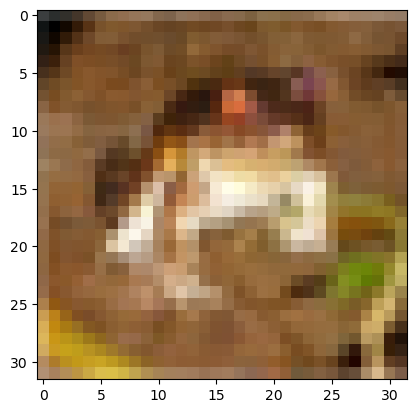

In [56]:
img = plt.imshow(x_train[0])
plt.show()

In [58]:
print('The label is:', y_train[0])

The label is: [6]


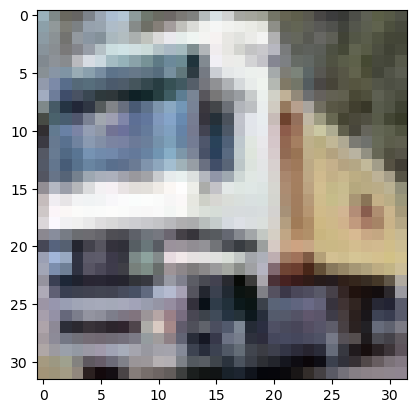

In [62]:
img = plt.imshow(x_train[1])
plt.show()

In [64]:
print('The label is:', y_train[1])

The label is: [9]


In [66]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [68]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [70]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [72]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# Build and Train the CNN

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [77]:
model = Sequential()

In [79]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

C:\Users\trevo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [83]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [85]:
model.add(Dropout(0.25))

In [87]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [89]:
model.add(Flatten())

In [91]:
model.add(Dense(512, activation='relu'))

In [93]:
model.add(Dropout(0.5))

In [95]:
model.add(Dense(10, activation='softmax'))

In [97]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [101]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3301 - loss: 1.8030 - val_accuracy: 0.5739 - val_loss: 1.2011
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5710 - loss: 1.1981 - val_accuracy: 0.6369 - val_loss: 1.0141
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6380 - loss: 1.0052 - val_accuracy: 0.6905 - val_loss: 0.8645
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.6805 - loss: 0.8979 - val_accuracy: 0.7250 - val_loss: 0.7900
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7077 - loss: 0.8274 - val_accuracy: 0.7104 - val_loss: 0.8329
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7330 - loss: 0.7599 - val_accuracy: 0.7195 - val_loss: 0.8152
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7490 - loss: 0.7200 - val_accuracy: 0.7497 - val_loss: 0.7268
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7614 - 

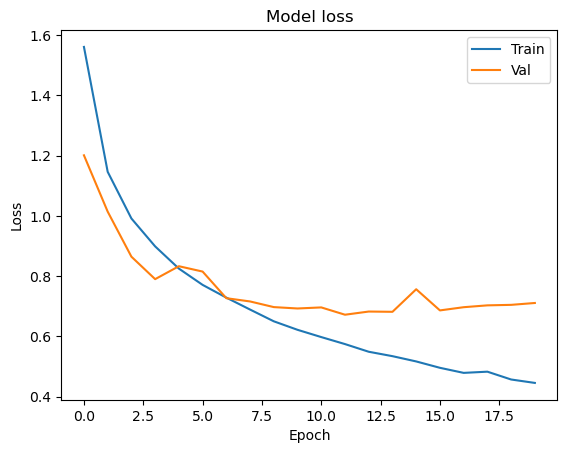

In [103]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

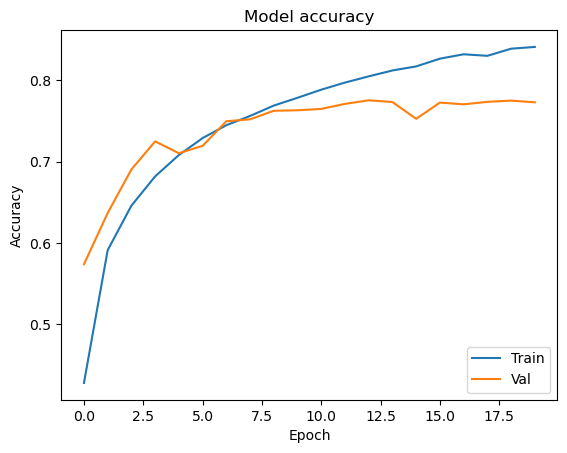

In [107]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [109]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7705 - loss: 0.7337


0.7689999938011169

In [111]:
model.save('my_cifar10_model.h5')

# Testing other images

In [114]:
my_image = plt.imread("cat.jpg")

In [116]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

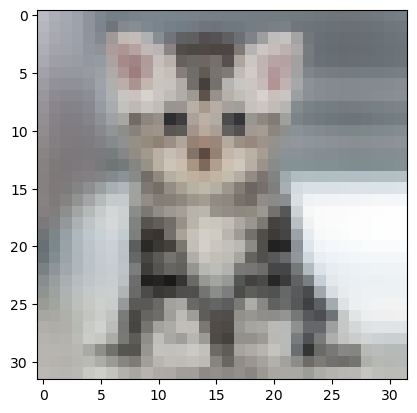

In [122]:
img = plt.imshow(my_image_resized)
plt.show()

In [124]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [126]:
probabilities

array([[2.5471111e-04, 1.4947245e-06, 3.8348287e-02, 3.5902521e-01,
        2.4383396e-01, 3.2075110e-01, 6.5510385e-03, 3.1156261e-02,
        7.2919553e-05, 5.0242379e-06]], dtype=float32)

In [128]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.3590252
Second most likely class: dog -- Probability: 0.3207511
Third most likely class: deer -- Probability: 0.24383396
Fourth most likely class: bird -- Probability: 0.038348287
Fifth most likely class: horse -- Probability: 0.03115626


# Cat 2 Test

In [131]:
my_image2 = plt.imread("cat2.jpg")

In [133]:
from skimage.transform import resize
my_image_resized2 = resize(my_image2, (32,32,3))

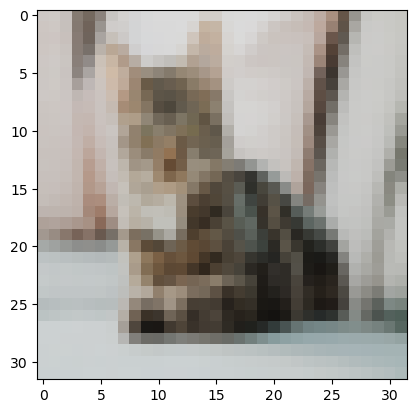

In [134]:
img2 = plt.imshow(my_image_resized2)
plt.show()

In [137]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized2,] ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [139]:
probabilities

array([[4.2672113e-05, 2.4304854e-06, 7.8076111e-05, 9.9913740e-01,
        4.4619374e-05, 9.6365067e-05, 6.0302395e-05, 2.6693925e-07,
        1.1813061e-05, 5.2606966e-04]], dtype=float32)

In [141]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.9991374
Second most likely class: truck -- Probability: 0.00052606966
Third most likely class: dog -- Probability: 9.636507e-05
Fourth most likely class: bird -- Probability: 7.807611e-05
Fifth most likely class: frog -- Probability: 6.0302395e-05
